# 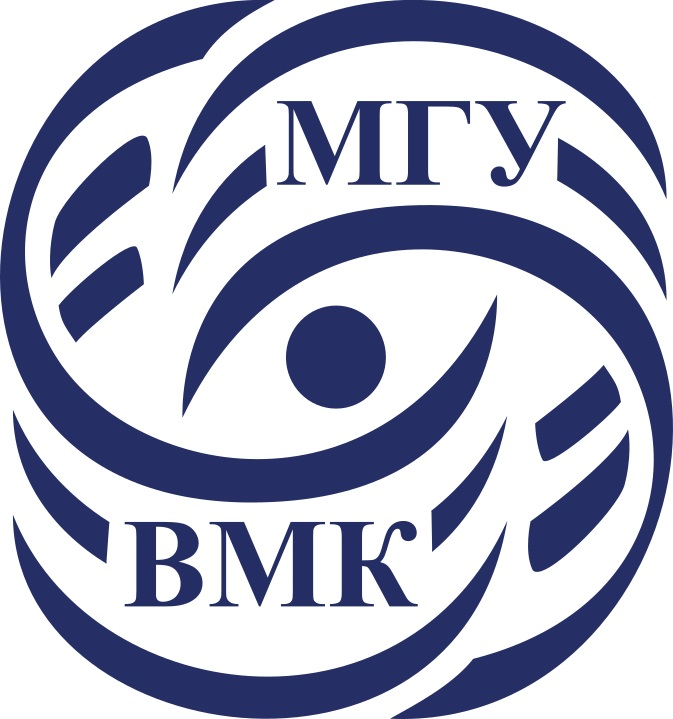

# Машинное обучение. ВМК МГУ


# Практическое задание 5: Линейные модели: регрессия

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое регуляризация, зачем она нужна, и чем отличаются разные регуляризаторы.
* Научиться решать задачу регрессии линейными моделями.
-------

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 5 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [70]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.63MB/s]


Проверим версию библиотеки:

In [71]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что <font color='CornflowerBlue'>**линейная регрессия**</font> — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека `scikit-learn` (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

---
Напомним, что линейная регрессия &mdash; это модель вида

$$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Для обучения параметров $w$ решается оптимизационная задача следующего вида:

$$\frac{1}{M} ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots + w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot R(w) \rightarrow \min_{w_1, \dots, w_n, b}$$

Здесь $R(w)$ &mdash; это регуляризация параметров модели, $\alpha$ &mdash; коэффициент регуляризации, задаваемый перед началом обучения.

Для обучения линейной регрессии, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- `LinearRegression` — линейная регрессия без регуляризации $R(w) = 0$ (метод наименьших квадратов)
- `Ridge` — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией $R(w) = \frac{1}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right)$
- `Lasso` — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией $R(w) = |w_1| + \dots + |w_n|$

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

---

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$.

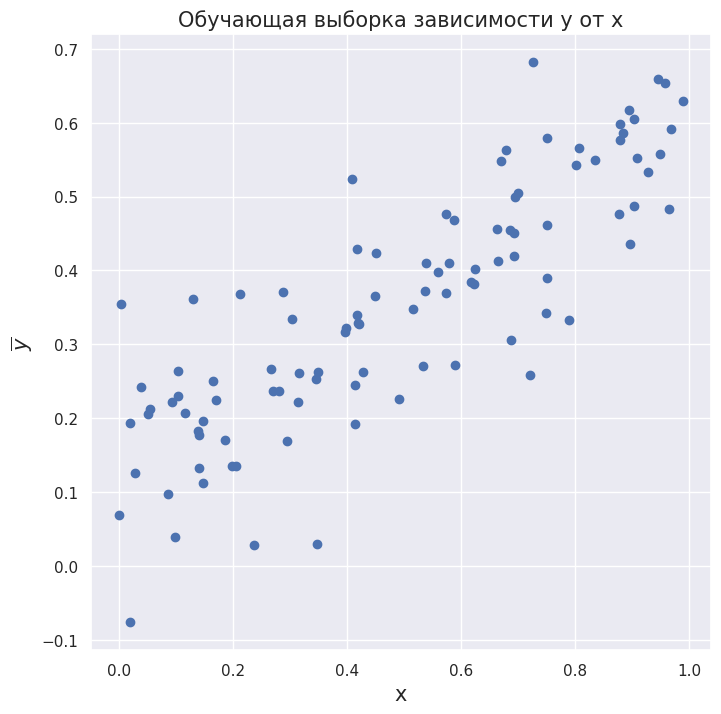

In [73]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

<font color='DarkSeaGreen'>**Обучим**</font> линейную регрессию с $l_2$ регуляризацией, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки `sklearn` (класс Ridge) коэффициент регуляризации задаётся параметром `alpha`

In [74]:
from sklearn.linear_model import Ridge

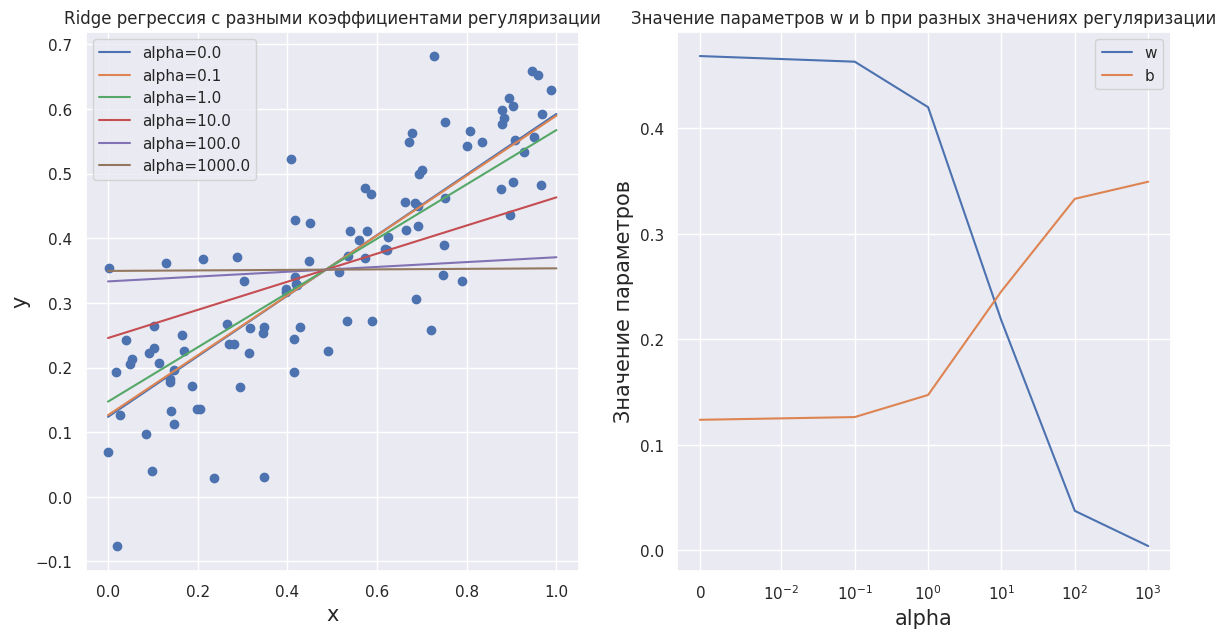

In [75]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha) # Задаем параметр alpha
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

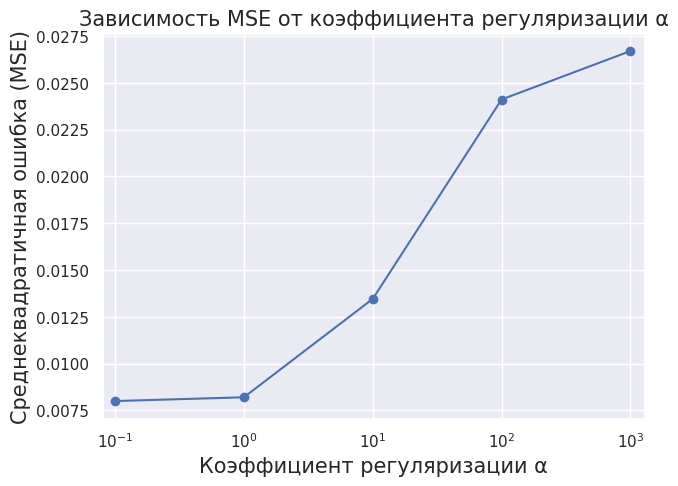

In [76]:
from sklearn.metrics import mean_squared_error

mse_values = []

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    Y_pred = reg.predict(X[:, None])
    mse = mean_squared_error(Y, Y_pred)
    mse_values.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(alphas[1:], mse_values[1:], marker='o')
plt.xscale('log')
plt.xlim(1e-1 - 0.02, 1e3 + 300)
plt.xticks(alphas[1:])
plt.xlabel("Коэффициент регуляризации α", size=15)
plt.ylabel("Среднеквадратичная ошибка (MSE)", size=15)
plt.title("Зависимость MSE от коэффициента регуляризации α", size=15)
plt.show()

### <font color='DarkOrange'>**Задание 1 [2 баллa]**</font>

Как зависят параметры модели от константы регуляризации? А качество?



<font color='MediumOrchid'>**Ваши выводы тут:**</font>

**С увеличением $\alpha$ значение веса $w$ уменьшается**, поскольку модель пытается уменьшить штраф за регуляризацию.

Напротив, значение смещения **$b$ увеличивается с увеличением $\alpha$**. Модель пытается компенсировать уменьшение $w$.

**Качество модели ухудшается с ростом $\alpha$.** Прогноз становится практически постоянным (прямая почти горизонтальная), поскольку вес модели стремится к нулю. Наибольшее влияние на прогноз оказывает именно константа $b$, что приводит к снижению способности модели адекватно отражать зависимости в данных.

---

Казалось бы, зачем нам <font color='CornflowerBlue'>**регуляризация**</font>?

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [77]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.1006220738265918 	w2: 0.20124414765318363


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [78]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.348 	w2: -6814478528879.28


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими.

Создадим обучающую выборку из того же распределения и посмотрим на качество:

In [79]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0209


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [80]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705892708396
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>
Рассмотрите больше примеров (хотя бы два) с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [81]:
np.random.seed(1)
X4 = np.hstack((X[:, None], 7.2 * X[:, None]))
Y4 = X4[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X4, Y4)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.9531103691329595 	w2: -0.0625


In [82]:
np.random.seed(1)
X4_test = np.random.uniform(0, 1, 100)
X4_test = np.hstack((X4_test[:, None], 7.2 * X4_test[:, None]))
Y4_test = X4_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y4_test_pred = np.sum(reg.coef_[None] * X4_test + reg.intercept_, axis=1)
print("MSE loss pred: %.4f" % np.mean((Y4_test_pred - Y4_test) ** 2))

X4_test[0, 1] = X4_test[0, 1] + 1e-10
Y4_test_pred_noisy = np.sum(reg.coef_[None] * X4_test + reg.intercept_, axis=1)
print("MSE loss pred noisy:", np.mean((Y4_test_pred_noisy - Y4_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y4_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y4_test_pred[0])

MSE loss pred: 0.0186
MSE loss pred noisy: 0.018550083565485265
Предсказание для первого объекта с шумом:  0.4189021457145806
Предсказание для первого объекта без шума:  0.4189021457208306


In [83]:
np.random.seed(1)
X5 = np.hstack((X[:, None], -0.6 * X[:, None]))
Y5 = X5[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X5, Y5)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 15924534791483.934 	w2: 26540891319139.047


In [84]:
np.random.seed(1)
X5_test = np.random.uniform(0, 1, 100)
X5_test = np.hstack((X5_test[:, None], -0.6 * X5_test[:, None]))
Y5_test = X5_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y5_test_pred = np.sum(reg.coef_[None] * X5_test + reg.intercept_, axis=1)
print("MSE loss pred: %.4f" % np.mean((Y5_test_pred - Y5_test) ** 2))

X5_test[0, 1] = X5_test[0, 1] + 1e-10
Y5_test_pred_noisy = np.sum(reg.coef_[None] * X5_test + reg.intercept_, axis=1)
print("MSE loss pred noisy:", np.mean((Y5_test_pred_noisy - Y5_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y5_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y5_test_pred[0])

MSE loss pred: 0.0168
MSE loss pred noisy: 70445.51030998873
Предсказание для первого объекта с шумом:  2654.4970703125
Предсказание для первого объекта без шума:  0.408203125


In [85]:
np.random.seed(1)
X6 = np.hstack((X[:, None], 2 + 5 * X[:, None]))
Y6 = X6[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X6, Y6)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 33795736088204.04 	w2: -6759147217640.705


In [86]:
np.random.seed(1)
X6_test = np.random.uniform(0, 1, 100)
X6_test = np.hstack((X6_test[:, None], 2 + 5 * X6_test[:, None]))
Y6_test = X6_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y6_test_pred = np.sum(reg.coef_[None] * X6_test + reg.intercept_, axis=1)
print("MSE loss pred: %.4f" % np.mean((Y6_test_pred - Y6_test) ** 2))

X6_test[0, 1] = X6_test[0, 1] + 1e-10
Y6_test_pred_noisy = np.sum(reg.coef_[None] * X6_test + reg.intercept_, axis=1)
print("MSE loss pred noisy:", np.mean((Y6_test_pred_noisy - Y6_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y6_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y6_test_pred[0])

MSE loss pred: 182744284438962540464046080.0000
MSE loss pred noisy: 1.827442844387798e+26
Предсказание для первого объекта с шумом:  13518294434605.893
Предсказание для первого объекта без шума:  13518294435281.807


-------------

## Масштабирование данных

Попробуем обучить линейную регрессию уже c $l_1$ регуляризацией (Lasso) на специальном датасете из sklearn

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [88]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.868  28.712  5.411  1.093  1416.185  3.109  35.637 -119.583]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [89]:
from sklearn.preprocessing import StandardScaler

### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

Отмасштабируйте данные при помощи класса `StandardScaler`. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

<font color='OrangeRed'>**Примечание**</font> Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [90]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
means_train = X_train_scaled.mean(axis=0)
vars_train = X_train_scaled.std(axis=0)

means_test = X_test_scaled.mean(axis=0)
vars_test = X_test_scaled.std(axis=0)

means_df = pd.DataFrame({
    'Признаки': [f'{i}' for i in range(X_train.shape[1])],
    'Среднее (train)': means_train,
    'Среднее (test)': means_test
})

vars_df = pd.DataFrame({
    'Признаки': [f'{i}' for i in range(X_train.shape[1])],
    'Дисперсия (train)': vars_train,
    'Дисперсия (test)': vars_test
})

print("Среднее:")
print(means_df.to_string(index=False))

print("\nДисперсия:")
print(vars_df.to_string(index=False))

Среднее:
Признаки  Среднее (train)  Среднее (test)
       0    -1.288523e-14        0.004365
       1    -1.220339e-16       -0.019148
       2     1.040433e-14        0.028255
       3     8.875896e-16        0.033454
       4    -2.774021e-18        0.027924
       5    -3.886601e-16       -0.010572
       6    -1.655542e-14       -0.008212
       7    -1.034925e-13        0.021639

Дисперсия:
Признаки  Дисперсия (train)  Дисперсия (test)
       0                1.0          1.038848
       1                1.0          1.008780
       2                1.0          1.447561
       3                1.0          1.663402
       4                1.0          1.068190
       5                1.0          0.264162
       6                1.0          0.992998
       7                1.0          0.994745


Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [93]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9798


### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

В чем плюсы RMSE по сравнению с MSE?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

RMSE легче воспринимается и интерпретируется, поскольку RMSE выражается в тех же единицах, что и целевая переменная.

Как RMSE, так и MSE вычисляются на основе квадратов ошибок, что означает, что большие ошибки (выбросы) оказывают большое влияние на итоговое значение. Однако RMSE, будучи корнем из MSE, немного смягчает это влияние.



Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [94]:
reg.coef_

array([ 0.28811554,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [95]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 8.50854581e-01  1.25545440e-01 -2.78892640e-01  3.08812622e-01
 -1.99686054e-04 -4.12942247e-02 -8.88296917e-01 -8.60046905e-01]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

---

## Подбор гиперпараметра при регуляризации

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью <font color='CornflowerBlue'>**кросс-валидации**</font>. В sklearn есть несколько классов со встроенной кросс-валидацией

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### <font color='DarkOrange'>**Задание 5 [3 баллa]**</font>

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


<font color='LightSteelBlue'>**Подсказка**</font>

* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

<font color='OrangeRed'>**Примечание**</font> Итоговое качество должно быть не больше 0.73 RMSE. За меньшее качество балл будет снижаться

In [97]:
model_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso())
])

model_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge())
])

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid={"regr__alpha": np.logspace(-3, 3, 10)}
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid={"regr__alpha": np.logspace(-3, 3, 10)}
)

lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

best_lasso_alpha = lasso_cv.best_params_["regr__alpha"]
best_lasso_rmse = mean_squared_error(y_test, lasso_cv.predict(X_test), squared=False)

best_ridge_alpha = ridge_cv.best_params_["regr__alpha"]
best_ridge_rmse = mean_squared_error(y_test, ridge_cv.predict(X_test), squared=False)

print(f'Best Lasso Regression:\nalpha = {best_lasso_alpha}, RMSE = {best_lasso_rmse}')
print(f'\nBest Ridge Regression:\nalpha = {best_ridge_alpha}, RMSE = {best_ridge_rmse}')

Best Lasso Regression:
alpha = 0.001, RMSE = 0.732535113312992

Best Ridge Regression:
alpha = 2.154434690031882, RMSE = 0.7331800110386439


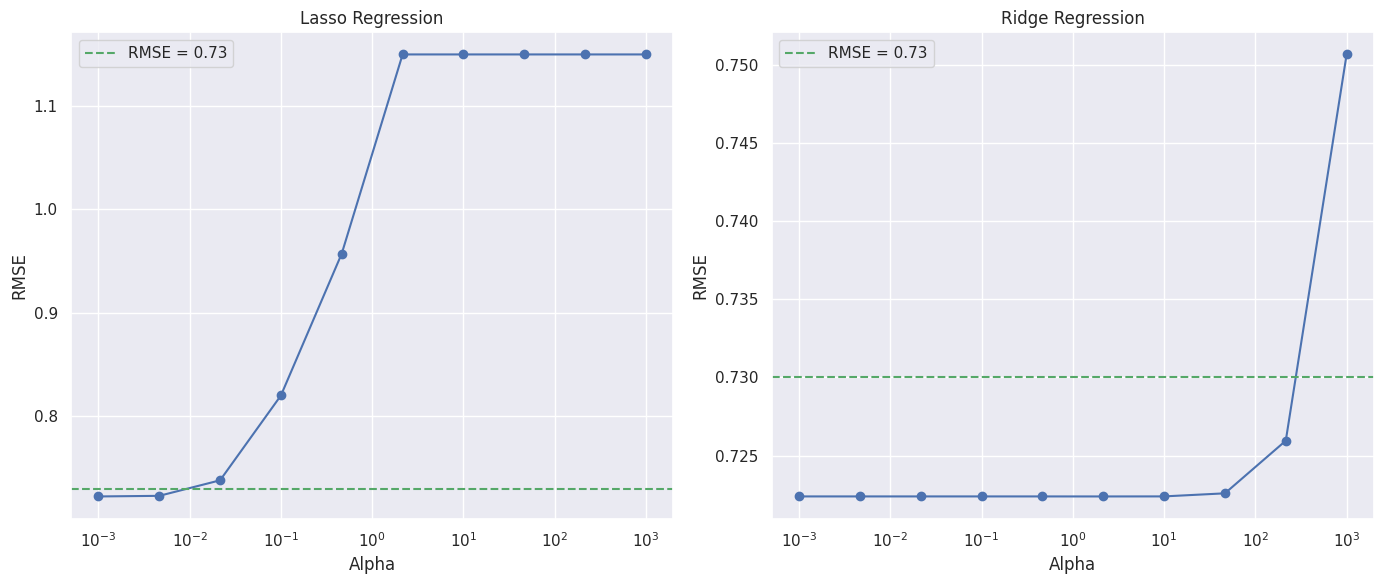

In [98]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lasso_cv.cv_results_['param_regr__alpha'],
         -lasso_cv.cv_results_['mean_test_score'],
         marker='o')
plt.xscale('log')
plt.title('Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.axhline(0.73, color='g', linestyle='--', label='RMSE = 0.73')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ridge_cv.cv_results_['param_regr__alpha'],
         -ridge_cv.cv_results_['mean_test_score'],
         marker='o')
plt.xscale('log')
plt.title('Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.axhline(0.73, color='g', linestyle='--', label='RMSE = 0.73')
plt.legend()
plt.tight_layout()

plt.show()

In [99]:
lasso_alphas = lasso_cv.cv_results_['param_regr__alpha']
lasso_rmse_scores = -lasso_cv.cv_results_['mean_test_score']

lasso_filtered_alphas = lasso_alphas[lasso_rmse_scores < 0.73]
lasso_filtered_rmse = lasso_rmse_scores[lasso_rmse_scores < 0.73]

sorted_lasso_indices = np.argsort(lasso_filtered_rmse)
sorted_lasso_alphas = lasso_filtered_alphas[sorted_lasso_indices]
sorted_lasso_rmse = lasso_filtered_rmse[sorted_lasso_indices]

print("Lasso Regression:")
for alpha, rmse in zip(sorted_lasso_alphas, sorted_lasso_rmse):
    print(f'alpha = {alpha:.6f}, RMSE = {rmse:.4f}')

ridge_alphas = ridge_cv.cv_results_['param_regr__alpha']
ridge_rmse_scores = -ridge_cv.cv_results_['mean_test_score']

ridge_filtered_alphas = ridge_alphas[ridge_rmse_scores < 0.73]
ridge_filtered_rmse = ridge_rmse_scores[ridge_rmse_scores < 0.73]

sorted_ridge_indices = np.argsort(ridge_filtered_rmse)
sorted_ridge_alphas = ridge_filtered_alphas[sorted_ridge_indices]
sorted_ridge_rmse = ridge_filtered_rmse[sorted_ridge_indices]

print("\nRidge Regression:")
for alpha, rmse in zip(sorted_ridge_alphas, sorted_ridge_rmse):
    print(f'alpha = {alpha:.6f}, RMSE = {rmse:.4f}')

Lasso Regression:
alpha = 0.001000, RMSE = 0.7224
alpha = 0.004642, RMSE = 0.7230

Ridge Regression:
alpha = 2.154435, RMSE = 0.7224
alpha = 0.464159, RMSE = 0.7224
alpha = 0.100000, RMSE = 0.7224
alpha = 0.021544, RMSE = 0.7224
alpha = 0.004642, RMSE = 0.7224
alpha = 0.001000, RMSE = 0.7224
alpha = 10.000000, RMSE = 0.7224
alpha = 46.415888, RMSE = 0.7226
alpha = 215.443469, RMSE = 0.7259


In [100]:
fixed_alpha_lasso = 0.01
model_lasso_fixed = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso(alpha=fixed_alpha_lasso))
])

model_lasso_fixed.fit(X_train, y_train)
lasso_fixed_rmse = mean_squared_error(y_test, model_lasso_fixed.predict(X_test), squared=False)

fixed_alpha_ridge = 129
model_ridge_fixed = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge(alpha=fixed_alpha_ridge))
])

model_ridge_fixed.fit(X_train, y_train)
ridge_fixed_rmse = mean_squared_error(y_test, model_ridge_fixed.predict(X_test), squared=False)

print(f'Fixed Lasso Regression:\nalpha = {fixed_alpha_lasso}, RMSE = {lasso_fixed_rmse}')
print(f'\nFixed Ridge Regression:\nalpha = {fixed_alpha_ridge}, RMSE = {ridge_fixed_rmse}')

Fixed Lasso Regression:
alpha = 0.01, RMSE = 0.7304831224428135

Fixed Ridge Regression:
alpha = 129, RMSE = 0.7322265297713481


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [101]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.84604739,  0.12597833, -0.26816238,  0.29792527,  0.        ,
       -0.04027369, -0.87740579, -0.84850035])

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Кaк подбирать параметры линейной модели.

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
